In [1]:
!pip install prophet

import pandas as pd
from prophet import Prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --------------- ------------------------ 5.2/13.3 MB 31.2 MB/s eta 0:00:01
   ---------------------------------------  13.1/13.3 MB 36.7 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 34.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 33.8 MB/s eta 0:00:00

   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   -------------

10:28:15 - cmdstanpy - INFO - Chain [1] start processing
10:28:19 - cmdstanpy - INFO - Chain [1] done processing


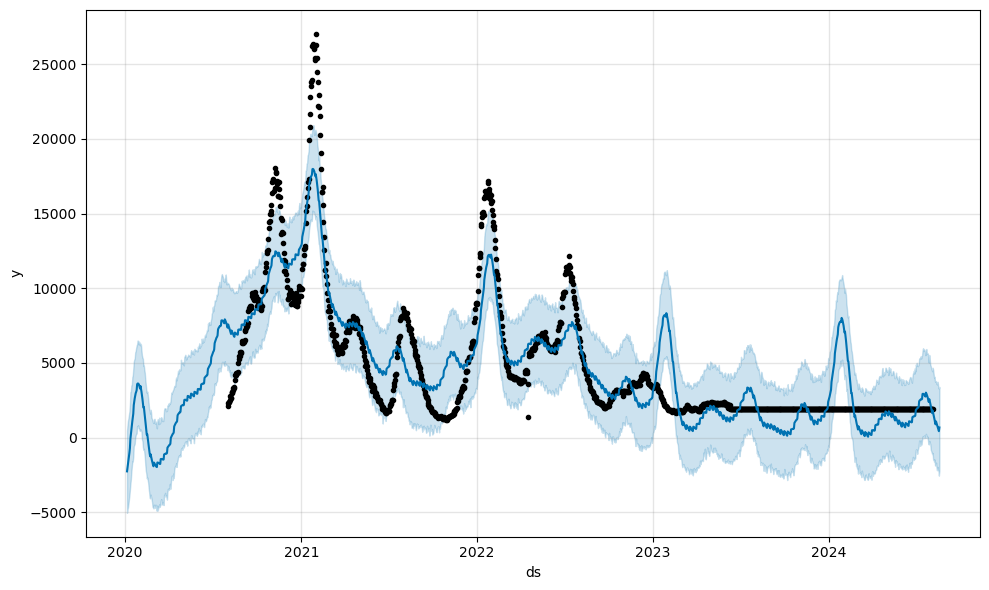

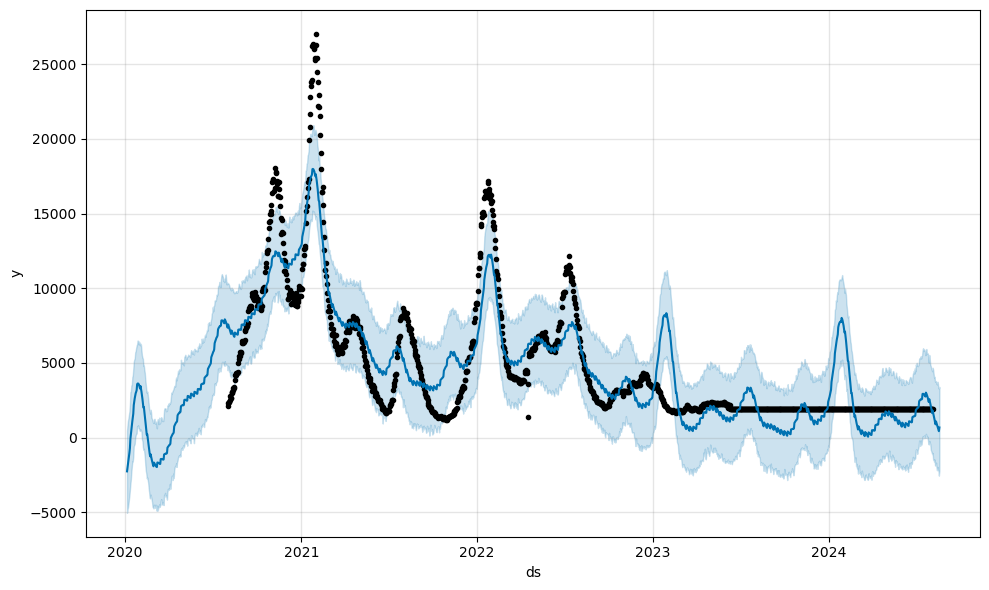

In [2]:
# Cargar datos
df = pd.read_csv("../data/hospital_spain_clean.csv", parse_dates=['date'])

# Preparar datos para Prophet
df_prophet = df[['date', 'hosp_patients']].rename(columns={'date':'ds', 'hosp_patients':'y'})

# Entrenar modelo
model = Prophet()
model.fit(df_prophet)

# Predicción 14 días hacia adelante
future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)

# Visualizar
model.plot(forecast)

In [3]:
# Guardar modelo
import joblib
joblib.dump(model, "../src/hospital_model.pkl")

['../src/hospital_model.pkl']